In [13]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [61]:
class Reservoir():
    
    def __init__(self, name='', A=1, IC = 0):
        self.name = name
        self.A = A
        self._log = {'t':[], 'h':[]}
        self.h = IC
        self.t = 0
        
    def initialize(self):
        self._log['t'].append(self.t)
        self._log['h'].append(self.h)
        return self.h
        
    def deriv(self,h,t, qin, qout):
        dh = (qin - qout)/self.A
        return dh
    
    def plot(self):
        t = self._log['t']
        h = self._log['h']
        plt.plot(t,h,label=self.name + ' h')
        plt.legend()
    
    def update(self,t, qin, qout):
        self.h = self.h + dt*self.deriv(t,h,qin,qout)
        self._log['t'].append(t)
        self._log['h'].append(float(self.h))
        self.t += dt
        return self.h
        

0.026986122131347656


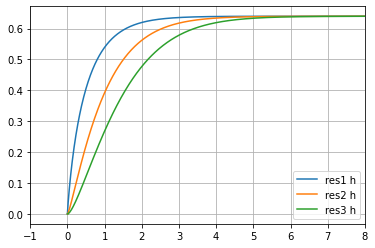

In [62]:
# test Reservoir
import time

def qin(t):
    return 0.4

def qout(t, h):
    Cv = 0.5
    return Cv*np.sqrt(h)

def power(t, q, dH):
    return q * K *dH

A = 0.2
res1 = Reservoir(name='res1', A = A, IC=0)
h1 = res1.initialize()
z1 = res1.get_level()

res2 = Reservoir(name='res2', A = A, IC=0)
h2 = res2.initialize()
z2 = res1.get_level()

res3 = Reservoir(name='res3', A = A, IC=0)
h3 = res3.initialize()
z3 = res1.get_level()

dz12 = z1 - z2
dz23 = z2 - z3

start = time.time()
dt = 0.01
for t in np.arange(dt,20,dt):
    q0 = qin(t)
    q12 = qout(t, h1)
    h1 = res1.update(t, q0, q12)
    z1 = res1.get_level()
    p1 = power(t, q12,dz12)
    
    q23 = qout(t, h2)
    h2 = res2.update(t, q12, q23)
    z2 = res1.get_level()
    p2 = power(t, q23,dz23)
    
    q3s = qout(t, h3)
    h3 = res3.update(t, q23, q3s)
    z3 = res1.get_level()
    p3 = power(t, q3s,z3)
    
    dz12 = z1 - z2
    dz23 = z2 - z3

end = time.time()

print(end - start)
res1.plot()
res2.plot()
res3.plot()
plt.xlim([-1, 8])
plt.grid()

In [47]:
res1._log['h']

[0,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.6399999999999886,
 0.639999